In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

data = pd.DataFrame.from_csv('./dnc-temporalGraph/out.dnc-temporalGraph', sep = '\t', header = 0, index_col=None)
data = data.drop('weight', 1)
data.head()

,from,to,timestamp
0,419,465,1463507482
1,869,453,1462337903
2,943,1151,1463167636
3,943,217,1463167636
4,943,841,1463167636


In [2]:
n = np.max(data['to'])
A = np.zeros((n,n))
for index, row in data.iterrows():
    A[row['from']-1, row['to']-1] = 1 #+=1

In [3]:
import networkx as nx
G = nx.from_numpy_matrix(A,create_using=nx.DiGraph())
G.is_directed()

True

Email Graph


C:\Users\alexf\AppData\Local\Continuum\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\alexf\AppData\Local\Continuum\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  plt.hold(b)
C:\Users\alexf\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\__init__.py:917: UserWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  warnings.warn(self.msg_depr_set % key)
C:\Users\alexf\AppData\Local\Continuum\Anaconda3\lib\site-packages\matplotlib\rcsetup.py:152: UserWarning: axes.hold is

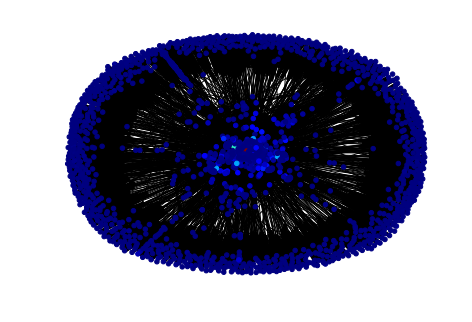

In [4]:
def draw(G):
    pos = nx.spring_layout(G)
    degree = G.degree()
    nodes = G.nodes()
    n_color = np.asarray([degree[n] for n in nodes])
    nx.draw(G, pos, node_color=n_color, node_size=20, cmap=plt.cm.jet)
    plt.show()
print('Email Graph')
draw(G)

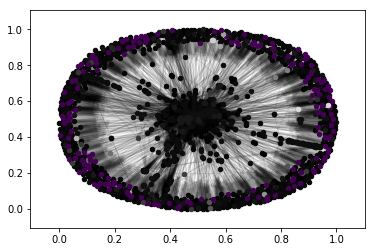

In [20]:
from community import community_louvain

import networkx as nx
import matplotlib.pyplot as plt

#better with karate_graph() as defined in networkx example.
#erdos renyi don't have true community structure
#G = nx.erdos_renyi_graph(30, 0.05)

#first compute the best partition
partition = community_louvain.best_partition(G.to_undirected())

#drawing
size = float(len(set(partition.values())))
pos = nx.spring_layout(G)
count = 0.
for com in set(partition.values()) :
    count = count + 1.
    list_nodes = [nodes for nodes in partition.keys()
                                if partition[nodes] == com]
    nx.draw_networkx_nodes(G, pos, list_nodes, node_size = 20,
                                node_color = str(count / size))


nx.draw_networkx_edges(G, pos, alpha=0.1)
plt.figure(figsize=(50,50))
plt.show()